[Reference](https://towardsdatascience.com/introduction-to-yellowbrick-a-python-library-to-explain-the-prediction-of-your-machine-learning-d63ecee10ecc)

In [1]:
!pip install yellowbrick

In [3]:
!pip install "yellowbrick==1.1"

     |████████████████████████████████| 266kB 3.1MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.features import Rank1D
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/parulnith/Analysing-Machine-Learning-Models-with-Yellowbrick/master/data/occupancy/occupancy.csv')
df.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
feature_names = ['temperature', 'relative humidity', 'light', 'C02','humidity']
target_name = 'occupancy'
X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()

array([[2.31800000e+01, 2.72720000e+01, 4.26000000e+02, 7.21250000e+02,
        4.79298818e-03],
       [2.31500000e+01, 2.72675000e+01, 4.29500000e+02, 7.14000000e+02,
        4.78344095e-03],
       [2.31500000e+01, 2.72450000e+01, 4.26000000e+02, 7.13500000e+02,
        4.77946352e-03],
       ...,
       [2.08900000e+01, 2.77450000e+01, 4.23500000e+02, 1.52150000e+03,
        4.23681810e-03],
       [2.08900000e+01, 2.80225000e+01, 4.18750000e+02, 1.63200000e+03,
        4.27948547e-03],
       [2.10000000e+01, 2.81000000e+01, 4.09000000e+02, 1.86400000e+03,
        4.32073200e-03]])

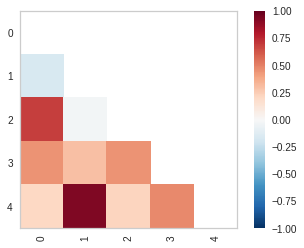

In [12]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)           
visualizer.transform(X)

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ea7910f28>,
             labels=['unoccupied', 'occupied'])

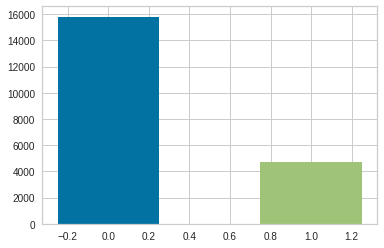

In [14]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y)        # Fit the data to the visualizer

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

0.9885700389105059

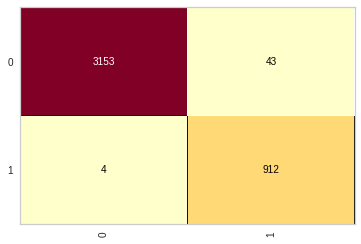

In [22]:
from yellowbrick.classifier import ConfusionMatrix

logReg = LogisticRegression()

cm = ConfusionMatrix(logReg)

cm.fit(X_train, y_train)

cm.score(X_test, y_test)

0.9885700389105059

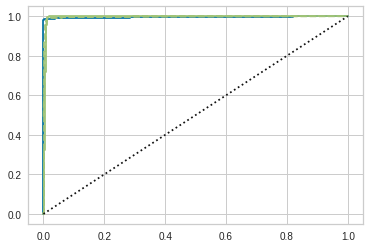

In [24]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logReg)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)

LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ea46b44e0>,
              cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
              exploit_incremental_learning=False, groups=None, model=None,
              n_jobs=1, pre_dispatch='all', random_state=None, scoring='f1',
              shuffle=False,
              train_sizes=array([0.3       , 0.37777778, 0.45555556, 0.53333333, 0.61111111,
       0.68888889, 0.76666667, 0.84444444, 0.92222222, 1.        ]))

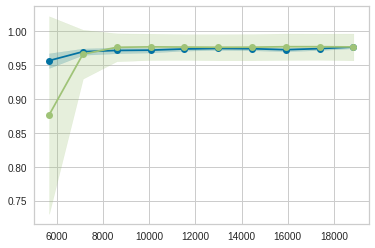

In [30]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

#Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    logReg, cv=cv, scoring='f1', train_sizes=sizes, 
)

visualizer.fit(X, y)        # Fit the data to the visualizer

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ea4631b38>,
                   colormap=None, colors=None, is_fitted=None, labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

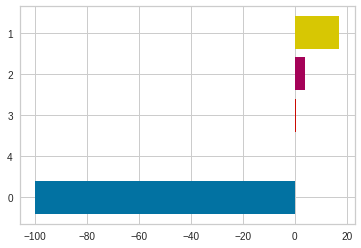

In [31]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(logReg)
viz.fit(X, y)